## Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('TSR.xlsx',sheet_name= 0)

In [3]:
type(df)
df.head()

,Monthly car sales in Quebec 1960-1968,Unnamed: 1
0,Exported from datamarket.com,NaN
1,NaN,NaN
2,Yrmo,Monthly car sales in Quebec 1960-1968
3,1960-01-01 00:00:00,6550
4,1960-02-01 00:00:00,8728


In [4]:
df = df.iloc[3:]
df

,Monthly car sales in Quebec 1960-1968,Unnamed: 1
3,1960-01-01 00:00:00,6550
4,1960-02-01 00:00:00,8728
5,1960-03-01 00:00:00,12026
6,1960-04-01 00:00:00,14395
7,1960-05-01 00:00:00,14587
...,...,...
106,1968-08-01 00:00:00,16722
107,1968-09-01 00:00:00,14385
108,1968-10-01 00:00:00,21342
109,1968-11-01 00:00:00,17180


In [5]:
df.rename(columns = {'Monthly car sales in Quebec 1960-1968':'date','Unnamed: 1':'sales'}, inplace = True)
df

,date,sales
3,1960-01-01 00:00:00,6550
4,1960-02-01 00:00:00,8728
5,1960-03-01 00:00:00,12026
6,1960-04-01 00:00:00,14395
7,1960-05-01 00:00:00,14587
...,...,...
106,1968-08-01 00:00:00,16722
107,1968-09-01 00:00:00,14385
108,1968-10-01 00:00:00,21342
109,1968-11-01 00:00:00,17180


In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df

,date,sales,year,month
3,1960-01-01,6550,1960,1
4,1960-02-01,8728,1960,2
5,1960-03-01,12026,1960,3
6,1960-04-01,14395,1960,4
7,1960-05-01,14587,1960,5
...,...,...,...,...
106,1968-08-01,16722,1968,8
107,1968-09-01,14385,1968,9
108,1968-10-01,21342,1968,10
109,1968-11-01,17180,1968,11


In [8]:
df2 = df

In [9]:
df = df.drop(['date'], axis=1)

In [10]:
df['year'] = df['year'].astype('int')
df['month'] = df['month'].astype('int')
df['sales'] = df['sales'].astype('float')

In [11]:
df.isna().sum()

sales    0
year     0
month    0
dtype: int64

In [12]:
df.describe()

,sales,year,month
count,108.000000,108.000000,108.000000
mean,14595.111111,1964.000000,6.500000
std,4525.213913,2.594026,3.468146
min,5568.000000,1960.000000,1.000000
25%,11391.250000,1962.000000,3.750000
50%,14076.000000,1964.000000,6.500000
75%,17595.750000,1966.000000,9.250000
max,26099.000000,1968.000000,12.000000


##### We assume null hypothesis such that there is no relation between input variables and output variables which is that the beta coefficients is equal to zero.
##### Alternate hypothesis is that there is relation between input and output variable so that the beta coefficients are not zero

## Exploratory Data Analysis

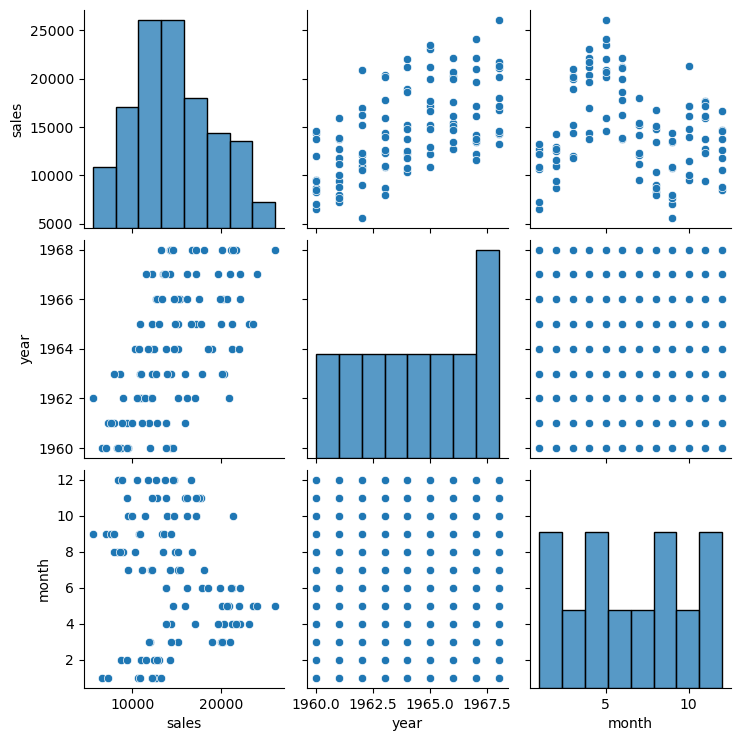

In [13]:
sns.pairplot(df)

## Split data

In [14]:
X = df.drop(['sales'],axis=1)
Y = df['sales']

In [15]:
X.head()

,year,month
3,1960,1
4,1960,2
5,1960,3
6,1960,4
7,1960,5


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## Modeling

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

#### Intercept and Beta coefficient

In [18]:
print(model.intercept_)
print(model.coef_)

-1601958.8647243034
[ 823.480367   -131.82790386]


## Predictions

In [19]:
test_pred = model.predict(X_test)
test_pred

array([16212.56936686, 10612.54764558, 11403.51506874, 15421.6019437 ,
       15784.57271144, 15125.43319214, 12786.81999501, 13214.81665043,
       16245.0823107 , 10480.71974173, 15685.25775142, 15948.91355914,
       11930.82668417, 15817.08565528, 11963.33962802, 14861.77738442,
       14170.12492129, 16344.39727071, 17200.39058155, 13610.30036201,
       12754.30705117, 14401.26778516, 15520.91690372, 13314.13161045,
       11436.02801258, 12654.99209115, 12951.16084271, 17991.35800471,
       12358.82333959, 13346.64455429, 17167.87763771, 17036.04973385,
       10744.37554944])

## Evaluation

In [20]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [21]:
print("MAE: ",mean_absolute_error(test_pred,y_test))
print("MSE: ",mean_squared_error(test_pred,y_test))
print("RSME: ",np.sqrt(mean_absolute_error(test_pred,y_test)))
print("R_score: ",r2_score(test_pred,y_test))
print("model score: ",model.score(X_test,y_test))

MAE:  2816.8134135643627
MSE:  12928235.126246667
RSME:  53.07366026160587
R_score:  -1.9141540948929379
model score:  0.47714630784268997


## Checking for Assumptions

## Linearity of error

In [22]:
res = y_test - test_pred
res

80     3720.430633
13    -1248.547646
7      3183.484931
86     -701.601944
65     4205.427289
70     -358.433192
33     -643.819995
48      717.183350
98    -2532.082311
14    -2024.719742
84      449.742249
82     -835.913559
3     -5380.826684
83    -2416.085655
21     -820.339628
72     2268.222616
59    -3378.124921
79     4332.602729
109     -20.390582
45    -1342.300362
15    -5517.307051
39    -3539.267785
67     8020.083096
29     1885.868390
25     1322.971987
34    -3657.992091
50     -323.160843
103    8107.641995
18     1425.176660
47    -5384.644554
91     6913.122362
92     5077.950266
12    -1199.375549
Name: sales, dtype: float64

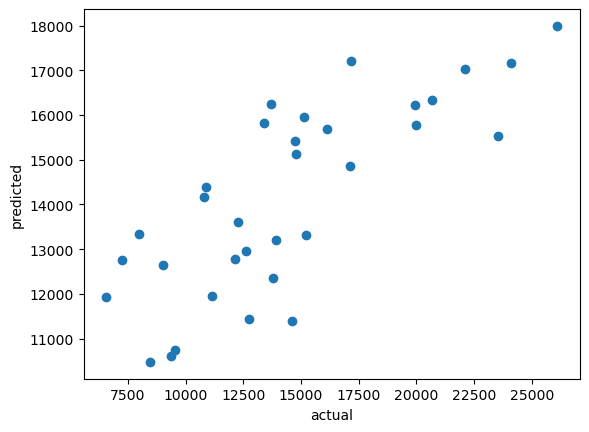

In [23]:
plt.scatter(y_test,test_pred)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

## Normality of error

<function matplotlib.pyplot.show(close=None, block=None)>

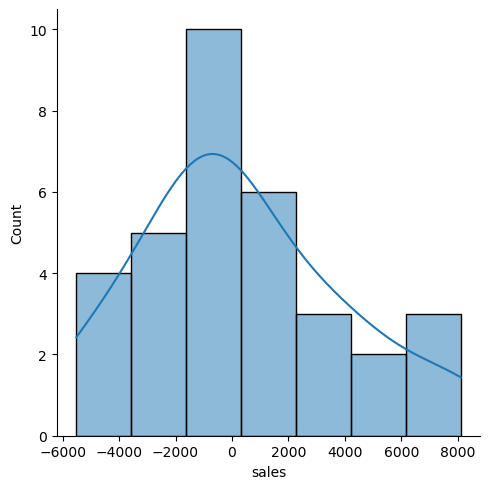

In [24]:
sns.displot(res,kde=True)
plt.show

## Equality of varience

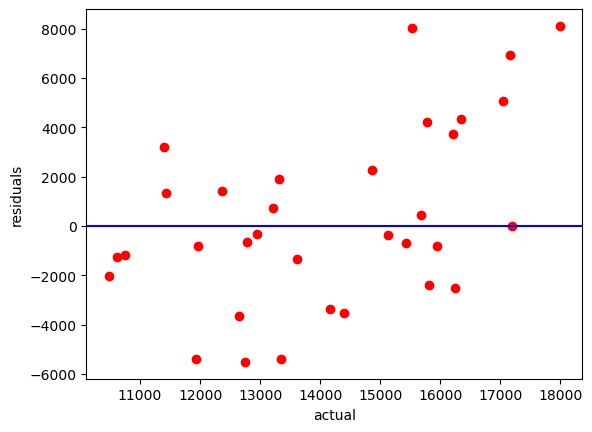

In [25]:
plt.scatter(test_pred,res,c='r')
plt.axhline(y=0,color='blue')
plt.xlabel('actual')
plt.ylabel('residuals')
plt.show()

## Durbin-Watson test

(null hypothesis): There is no correlation among the residuals.

(alternative hypothesis): The residuals are autocorrelated.

## varibles significance

In [26]:
from statsmodels.formula.api import ols

model = ols('sales ~ year+month', data=df).fit()

# Access the summary information
summary = model.summary()

# Print the summary
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     28.87
Date:                Sun, 21 May 2023   Prob (F-statistic):           1.02e-10
Time:                        19:54:29   Log-Likelihood:                -1038.2
No. Observations:                 108   AIC:                             2082.
Df Residuals:                     105   BIC:                             2090.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.973e+06   2.69e+05     -7.346      0.0

In [27]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(model.resid)

0.9098763668833983

A test statistic of 2 indicates no serial correlation.
The closer the test statistics is to 0, the more evidence of positive serial correlation.
The closer the test statistics is to 4, the more evidence of negative serial correlation.

since the test statistic is close to 0 there is positive serial correlation.

### Making Seasonal Indices


In [28]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Assume you have a DataFrame 'df' with a 'sales' column and 'date' column representing the original data

# Convert the 'date' column to a datetime data type if needed
df2['date'] = pd.to_datetime(df2['date'])

# Set the 'date' column as the DataFrame index
df2.set_index('date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(df2['sales'], model='additive')

# Obtain the seasonal component
seasonal_component = decomposition.seasonal

# Deseasonalize the data
df2['deseasonalized_sales'] = df2['sales'] / seasonal_component

# Print the deseasonalized sales
print(df2['deseasonalized_sales'])


date
1960-01-01     -2.016847
1960-02-01     -3.078339
1960-03-01      4.170623
1960-04-01       2.90582
1960-05-01      2.198841
                 ...    
1968-08-01     -5.069236
1968-09-01      -3.06325
1968-10-01     -34.72783
1968-11-01   -323.779734
1968-12-01     -6.014226
Name: deseasonalized_sales, Length: 108, dtype: object


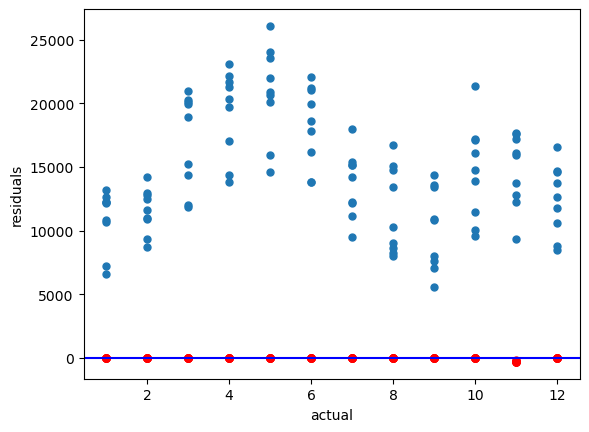

In [29]:
plt.plot(df['month'], df['sales'], 'o', markersize=5, label='Original Data')
plt.plot(df2['month'], df2['deseasonalized_sales'], 'o',color='red', markersize=5, label='Seasonalized Data')
plt.axhline(y=0,color='blue')
plt.xlabel('actual')
plt.ylabel('residuals')
plt.show()

In [30]:
X = df2.drop(['deseasonalized_sales','sales'],axis=1)
Y = df2['deseasonalized_sales']

In [31]:
X

,year,month
date,,
1960-01-01,1960,1
1960-02-01,1960,2
1960-03-01,1960,3
1960-04-01,1960,4
1960-05-01,1960,5
...,...,...
1968-08-01,1968,8
1968-09-01,1968,9
1968-10-01,1968,10


In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [115]:

## Modeling
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
#### Intercept and Beta coefficient
print(model.intercept_)
print(model.coef_)


5577.20270527663
[ -2.81994149 -10.56280074]


In [116]:
## Predictions
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)


In [117]:
## Evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("MAE: ",mean_absolute_error(test_pred,y_test))
print("MSE: ",mean_squared_error(test_pred,y_test))
print("RSME: ",np.sqrt(mean_absolute_error(test_pred,y_test)))
print("R_score: ",r2_score(test_pred,y_test))
print("model score: ",model.score(X_test,y_test))

MAE:  50.591756794977115
MSE:  4758.864579786147
RSME:  7.112788257425994
R_score:  -2.531850404225922
model score:  0.09645807531370676


### Reseasoning the data

In [118]:
predictions = np.concatenate((y_train_pred,y_test_pred))
df2['predictions'] = predictions
df2['predictions']

date
1960-01-01   -61.150504
1960-02-01   -45.664785
1960-03-01   -56.944551
1960-04-01    -8.336500
1960-05-01   -11.156442
                ...    
1968-08-01     5.046242
1968-09-01   -53.407645
1968-10-01   -22.436208
1968-11-01   -32.999008
1968-12-01   -55.510621
Name: predictions, Length: 108, dtype: float64

In [119]:
df2['Reseasoned_data'] = df2['predictions']*seasonal_component

In [120]:
df2

,sales,year,month,deseasonalized_sales,predictions,Reseasoned_data
date,,,,,,
1960-01-01,6550,1960,1,-2.016847,-61.150504,198595.073153
1960-02-01,8728,1960,2,-3.078339,-45.664785,129473.144166
1960-03-01,12026,1960,3,4.170623,-56.944551,-164199.712804
1960-04-01,14395,1960,4,2.90582,-8.336500,-41297.777500
1960-05-01,14587,1960,5,2.198841,-11.156442,-74011.272731
...,...,...,...,...,...,...
1968-08-01,16722,1968,8,-5.069236,5.046242,-16646.150589
1968-09-01,14385,1968,9,-3.06325,-53.407645,250801.928562
1968-10-01,21342,1968,10,-34.72783,-22.436208,13788.179223


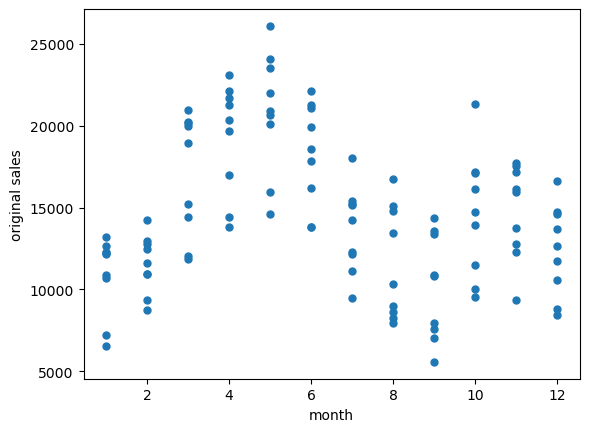

In [130]:
plt.plot(df['month'], df['sales'], 'o', markersize=5, label='Original Data')
plt.xlabel('month')
plt.ylabel('original sales')
plt.show()

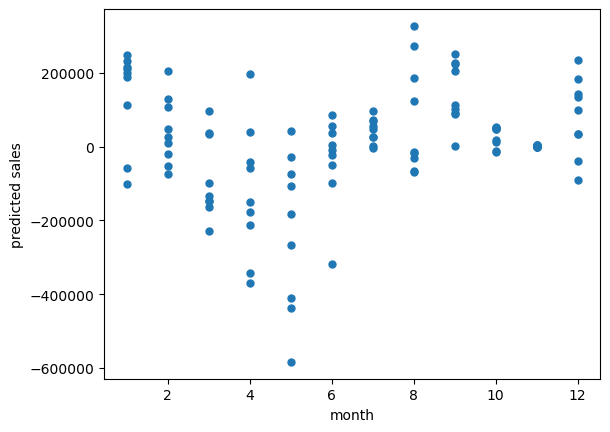

In [131]:
plt.plot(df2['month'], df2['Reseasoned_data'], 'o', markersize=5, label='Original Data')
plt.xlabel('month')
plt.ylabel('predicted sales')
plt.show()

## Evaluations

### Linearity

In [125]:
res = y_test - y_test_pred
res

date
1966-06-01     35.507875
1960-11-01   -110.403495
1960-05-01      4.895458
1966-12-01     87.482646
1965-03-01      2.603266
1965-08-01     44.008145
1962-07-01     17.818542
1963-10-01     41.300212
1967-12-01     90.718059
1960-12-01     73.147419
1966-10-01     46.175301
1966-08-01     46.723197
1960-01-01    -41.571432
1966-09-01      59.01376
1961-07-01      15.95747
1965-10-01      41.73629
1964-09-01     53.929457
1966-05-01     22.733112
1968-11-01    -235.14678
1963-07-01     20.518624
1961-01-01    -38.963029
1963-01-01     -34.43934
1965-05-01     20.344889
1962-03-01     -7.517733
1961-11-01   -171.566801
1962-08-01     37.297483
1963-12-01     79.885946
1968-05-01     29.190306
1961-04-01      -2.26376
1963-09-01     51.712157
1967-05-01     26.066172
1967-06-01     38.910877
1960-10-01      39.97894
Name: deseasonalized_sales, dtype: object

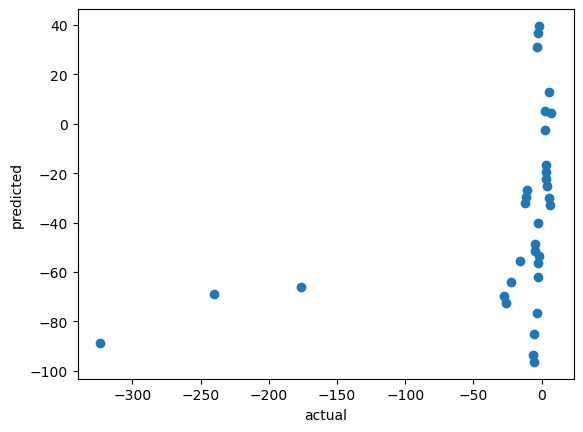

In [126]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()


## Normality of error


<function matplotlib.pyplot.show(close=None, block=None)>

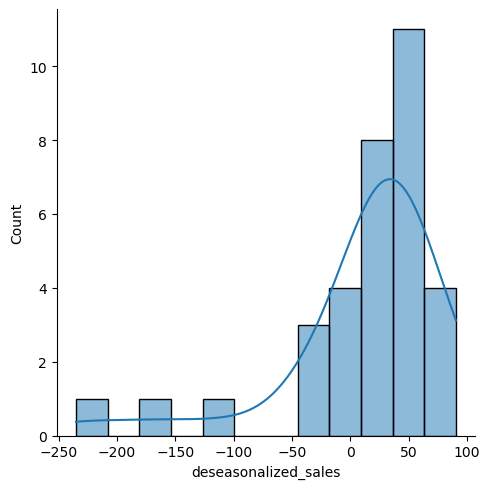

In [127]:
sns.displot(res,kde=True)
plt.show


## Equality of varience

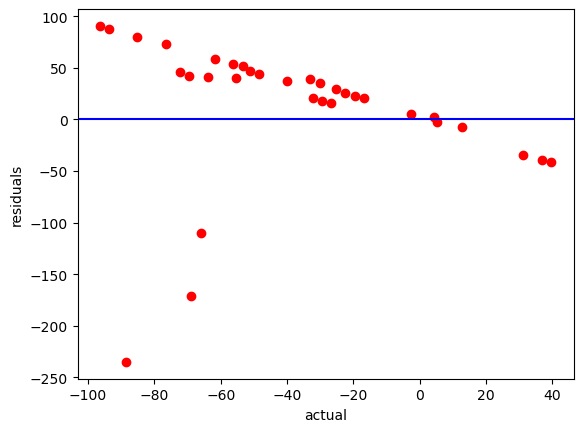

In [128]:
plt.scatter(test_pred,res,c='r')
plt.axhline(y=0,color='blue')
plt.xlabel('actual')
plt.ylabel('residuals')
plt.show()

## Inference
##### Linearity, equality of varience assumptions are not being satisfied and also after reseasoning the forecasted values are very high than the original data. The graph trend for the forecasted data is also in reverse order.

